# Segmentação de imagens

Este notebook utiliza scripts contendo todos os conceitos vistos anteriormente:

1. Definição de um loop de treinamento para imagens de segmentação no arquivo train.py. Veja o comentário no início do arquivo para entender as pequenas diferenças entre o treinamento de segmentação e de classificação;
2. Definição do dataset de segmentação no arquivo dataset.py (utilizado dentro do script train.py)
3. Definição do modelo EncoderDecoder dentro do arquivo models.py

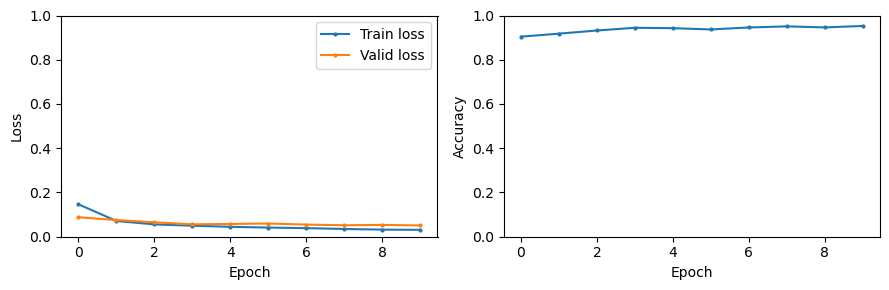

In [1]:
import torch
from torchvision.models import resnet18, ResNet18_Weights
import train
from models import EncoderDecoder

params = {
    'bs_train':32,
    'bs_valid':8,
    'num_epochs':10,
    'lr':0.01,
    'weight_decay':1e-3,
    'resize_size':384,  
    'seed':0
}

encoder = resnet18(weights=ResNet18_Weights.DEFAULT)
model = EncoderDecoder(encoder, decoder_channels=64, num_classes=2)
ds_train, ds_valid, logger = train.train(model, **params)

In [2]:
logger[-1]

(9, 0.031060459092259407, 0.050960078835487366, 0.9527960419654846)

### Segmentação utilizando modelos do Pytorch

O Pytorch possui modelos pré-treinados que podem ser utilizados

In [2]:
import torch
from torch import nn
from torchvision.models.segmentation import deeplabv3_resnet50, DeepLabV3_ResNet50_Weights

# Modelo de segmentação com encoder ResNet50 treinado no ImageNet 
# e encoder e decoder treinados no dataset COCO
model = deeplabv3_resnet50(weights=DeepLabV3_ResNet50_Weights.DEFAULT)
# Alteração do modelo para ter 2 canais como saída
model.classifier[4] = nn.Conv2d(256, 2, 1)

Um pequeno detalhe é que o modelo deeplab do Pytorch retorna um dicionário. O resultado do modelo pode ser acessado pela chave 'out'

In [3]:
x = torch.rand(8, 3, 224, 224)
out = model(x)['out']
out.shape

torch.Size([8, 2, 224, 224])

Então no script de treinamento é preciso acessar o resultado utilizando essa chave, senão o cálculo da entropia cruzada dará problema. 

Feito isso, o modelo pode ser treinado assim como fizemos acima

In [ ]:
params = {
    'bs_train':32,
    'bs_valid':8,
    'num_epochs':10,
    'lr':0.01,
    'weight_decay':1e-3,
    'resize_size':384,  
    'seed':0
}

# Linha comentada para evitar execução:
#ds_train, ds_valid, logger = train.train(model, **params)